# Hasil dan Analisa : 

- XGBoost + GS lebih baik dibandingkan XGBoost menggunakan default hyperparameter
- Nilai AUC dari XGBoost + GS -> 0.738 <br>
- Nilai AUC dari XGBoost + default hyperparameter -> 0.483
- Run di google colab waktunya lebih lama. Kalau lokal(windows) run xgboost =13 detik. kalau di google colab(CPU) =23 detik. google colab(GPU)=19 detik.
- Nilai subsample mempengaruhi waktu eksekusi. Subsample besar (paling besar 1) waktu eksekusi lebih lama

# Code :

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier 

In [2]:
X_bank=pd.read_csv('dataset/X_bank_preprocessed.csv').to_numpy()
y_bank=pd.read_csv('dataset/y_bank_preprocessed.csv').to_numpy().ravel()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/X_bank_preprocessed.csv'

## Experiment 1
- default hyperparameter
- pengaruh subsample terhadap waktu eksekusi
- pengaruh feature importance

### Default hyperparameter

In [14]:
# AUC dengan default hyperparameter
start_time = time.time()
model=XGBClassifier()
skf=StratifiedKFold(n_splits=5)
results=cross_val_score(model,X_bank,y_bank,cv=skf,scoring="roc_auc")
print(f"AUC: {round(results.mean(),4)}, std: {round(results.std(),4)}")
end_time = time.time()
print("waktu:",end_time-start_time)

AUC: 0.4837, std: 0.1006


In [ ]:
import time
def sum_of_n_numbers(n):
    
    s = 0
    for i in range(1,n+1):
        s = s + i
    
    return s,

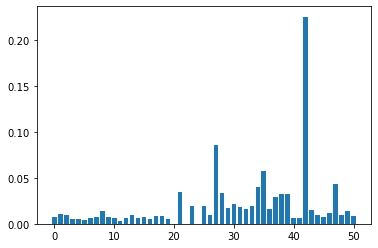

In [15]:
# feature importance 
from xgboost import plot_importance
from matplotlib import pyplot
model.fit(X_bank,y_bank)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [16]:
# menggunakan sebagian fitur 
model=XGBClassifier()
skf=StratifiedKFold(n_splits=5)
results=cross_val_score(model,X_bank[:,20:],y_bank,cv=skf,scoring="roc_auc")
print(f"AUC: {round(results.mean(),4)}, std: {round(results.std(),4)}")

AUC: 0.4668, std: 0.1083


### Default hyperparameter (subsample=1) di run sebanyak 5 x 

In [15]:
auc=[]
std=[]
waktu=[]
for i in range(0,5): 
    start_time = time.time()
    model=XGBClassifier()
    skf=StratifiedKFold(n_splits=5)
    results=cross_val_score(model,X_bank,y_bank,cv=skf,scoring="roc_auc")
    end_time = time.time()
    
    total=end_time-start_time 
    waktu.append(total)
    auc.append(results.mean())
    std.append(results.std())

[0.4836605879579482, 0.4836605879579482, 0.4836605879579482, 0.4836605879579482, 0.4836605879579482]
[0.10055120010896905, 0.10055120010896905, 0.10055120010896905, 0.10055120010896905, 0.10055120010896905]
[14.393108606338501, 13.281588315963745, 12.875, 13.267998218536377, 15.044999599456787]
13.772538948059083
0.8130723023590982


In [18]:
print("mean of AUC: ",auc)
print("std of AUC: ",std)
print("time: ",waktu)
print("mean of time: ",np.array(waktu).mean())
print("std of time: ",np.array(waktu).std())

mean of AUC:  [0.4836605879579482, 0.4836605879579482, 0.4836605879579482, 0.4836605879579482, 0.4836605879579482]
std of AUC:  [0.10055120010896905, 0.10055120010896905, 0.10055120010896905, 0.10055120010896905, 0.10055120010896905]
time:  [14.393108606338501, 13.281588315963745, 12.875, 13.267998218536377, 15.044999599456787]
mean of time:  13.772538948059083
std of time:  0.8130723023590982


### Subsample=0.1 di run sebanyak 5 x 

In [19]:
waktu=[]
for i in range(0,5): 
    start_time = time.time()
    model=XGBClassifier(subsample=0.1)
    skf=StratifiedKFold(n_splits=5)
    results=cross_val_score(model,X_bank,y_bank,cv=skf,scoring="roc_auc")
    end_time = time.time()
    
    total=end_time-start_time 
    waktu.append(total)

In [20]:
print("time: ",waktu)
print("mean of time: ",np.array(waktu).mean())
print("std of time: ",np.array(waktu).std())

time:  [11.994995355606079, 11.531998872756958, 11.507001399993896, 11.672998666763306, 11.66200065612793]
mean of time:  11.673798990249633
std of time:  0.1739170237555707


## Experiment 2
- xgboost + GS

In [6]:
model=XGBClassifier()
params={
    'eta': [0.001,0.01,0.1], # learning rate 
    'subsample': [0.1,0.4,0.8],
    'max_depth': [10,20,30],
    'gamma':[0.1,0.4,0.8],
    'min_child_weight':[2,5,11]
}

In [7]:
auc=[]
std=[]

grid_search= GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 5,
    verbose= 1
)
grid_search.fit(X_bank,y_bank)

best_index=grid_search.best_index_
auc.append(grid_search.cv_results_['mean_test_score'])
std.append(grid_search.cv_results_['std_test_score'])
best_param=grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 49.3min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 77.2min finished


In [8]:
print("All AUC: ",auc[0],'\n')
print("All std: ",std[0],'\n')
print("Best Hyperparameter: ",best_param,'\n')
print("Best index/iterasi : ",best_index)
print("Best AUC :",auc[0][best_index],"( std:",std[0][best_index],")",'\n')


All AUC:  [0.67428204 0.61508934 0.59593974 0.69096685 0.61972547 0.60539629
 0.73291815 0.64763957 0.59346375 0.67349381 0.58654434 0.53825234
 0.69233967 0.6080572  0.55751935 0.73277439 0.65086719 0.58640441
 0.67349356 0.58642905 0.53763079 0.69233967 0.60809046 0.55738382
 0.73277439 0.65086662 0.58638629 0.67406894 0.61612885 0.59695143
 0.69094542 0.62073438 0.60536294 0.73319082 0.64771237 0.59241147
 0.6732532  0.58733571 0.53920278 0.6924315  0.60831791 0.55926982
 0.73307518 0.65131709 0.58684724 0.67325264 0.58738979 0.5389379
 0.6924315  0.60834343 0.55929031 0.73307518 0.65131662 0.58682115
 0.67408067 0.6139185  0.59738879 0.69037278 0.6212186  0.60425353
 0.73319734 0.64805879 0.59154419 0.67299987 0.58853148 0.53929083
 0.69189269 0.60857245 0.55981182 0.73292801 0.65194459 0.58579335
 0.67299929 0.58832012 0.53920779 0.69189269 0.6085702  0.55976945
 0.73292801 0.65194378 0.58580074 0.68056201 0.60528774 0.56795538
 0.70286871 0.62482011 0.58862944 0.73771445 0.643057

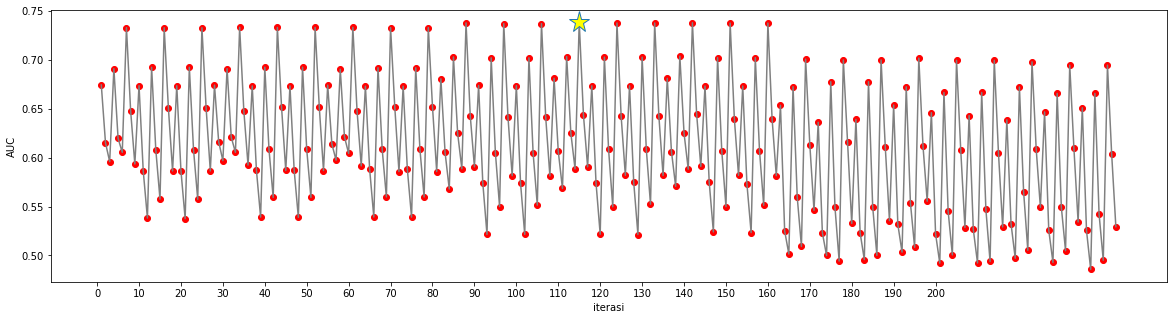

In [10]:
iteration=243
fig=plt.figure(figsize=(20,5))
x=range(1,iteration+1)
y=auc[0]
error=std[0]
plt.plot(x,y,'or')
plt.plot(x,y,color='gray')
plt.plot(x[best_index],y[best_index],marker='*',markersize=22,markerfacecolor='yellow')
fig=plt.xticks(range(1,iteration+1))
fig=plt.xlabel('iterasi')
fig=plt.ylabel('AUC')
fig=plt.xticks(range(0,210,10))

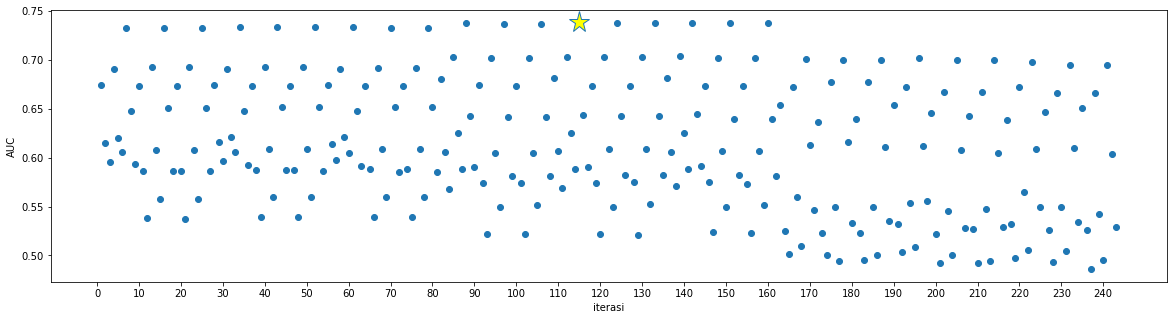

In [13]:
fig=plt.figure(figsize=(20,5))
x=range(1,iteration+1)
y=auc[0]
error=std[0]
plt.scatter(x,y)
plt.plot(x[best_index],y[best_index],marker='*',markersize=22,markerfacecolor='yellow')
fig=plt.xticks(range(1,iteration+1))
fig=plt.xlabel('iterasi')
fig=plt.ylabel('AUC')
fig=plt.xticks(range(0,244,10))

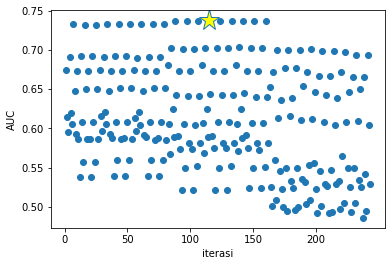

In [11]:
fig=plt.figure()
x=range(1,iteration+1)
y=auc[0]
error=std[0]
plt.scatter(x,y)
plt.plot(x[best_index],y[best_index],marker='*',markersize=22,markerfacecolor='yellow')
fig=plt.xticks(range(1,iteration+1))
fig=plt.xlabel('iterasi')
fig=plt.ylabel('AUC')
fig=plt.xticks(range(0,210,50))

Bersumber dari https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html, default metode cv yang digunakan ketika input value berupa integer adalah StratifiedKFold 

In [ ]:
print("Iterasi: ",iteration)
print("All AUC: ",auc[0],'\n')
print(np.mean(auc[0]))
print("All std: ",std[0],'\n')
print("Best Hyperparameter: ",best_param,'\n')
print("Best index/iterasi : ",best_index)
print("Best AUC :",auc[0][best_index],"( std:",std[0][best_index],")",'\n')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 53.4min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 82.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

In [ ]:
index=grid_search_clf.best_index_
print("Best params: ")
print(grid_search_clf.best_params_)
print("AUC: ")
print(grid_search_clf.cv_results_['mean_test_score'][index])
print("std: ")
print(grid_search_clf.cv_results_['std_test_score'][index])

Best params: 
{'eta': 0.01, 'gamma': 0.4, 'max_depth': 10, 'min_child_weight': 11, 'subsample': 0.1}
AUC: 
0.7382674790807361
std: 
0.12269998614087489


### Others

In [4]:
model=XGBClassifier(learning_rate=0.01,gamma=0.4,max_depth=10,min_child_weight=11,subsample=0.1)
skf=StratifiedKFold(n_splits=5)
results=cross_val_score(model,X_bank,y_bank,cv=skf,scoring="roc_auc")
print(f"AUC: {round(results.mean(),4)}, std: {round(results.std(),4)}")

AUC: 0.7383, std: 0.1227
